In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, normaltest

In [5]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [7]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [9]:
# to get the shape of dataframe (rows x columns)

df.shape

(13200, 7)

In [11]:
# to view the first 5 rows as default
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
# to view the last 5 as default
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [15]:
# to know how many unique values in a column
# unique
# here the total_sqft column

df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [17]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [19]:
# Checking for Missing values
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [21]:
# checking for duplicates
df.duplicated().sum()

1049

In [23]:
df['price_per_sqft'].value_counts()

price_per_sqft
5000     148
4000     139
3500     109
10000     77
5500      74
        ... 
4383       1
14933      1
7854       1
10400      1
10407      1
Name: count, Length: 4951, dtype: int64

In [25]:
df.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615


In [27]:
# Drop unnecessary columns
df = df.drop(columns=['bath','size'])
df.head()

,location,total_sqft,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,39.07,2,3699
1,Chikka Tirupathi,2600.0,120.00,4,4615
2,Uttarahalli,1440.0,62.00,3,4305
3,Lingadheeranahalli,1521.0,95.00,3,6245
4,Kothanur,1200.0,51.00,2,4250


In [39]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']


In [41]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

df_mean_std = df[(df['price_per_sqft'] > mean - 3*std) & (df['price_per_sqft'] < mean + 3*std)]

# PRINT THIS to see the output
print("Mean ± 3*STD method")
print(f"Number of rows after filtering: {df_mean_std.shape[0]}")
print(df_mean_std['price_per_sqft'].describe())


Mean ± 3*STD method
Number of rows after filtering: 13195
count     13195.000000
mean       6714.131123
std        4876.715543
min         267.829813
25%        4267.062384
50%        5434.782609
75%        7313.543844
max      200000.000000
Name: price_per_sqft, dtype: float64


In [47]:
# Calculate the 5th and 95th percentiles
lower_bound = df['price_per_sqft'].quantile(0.05)
upper_bound = df['price_per_sqft'].quantile(0.95)

# Filter the dataset
df_percentile = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

# Display summary
print("Percentile Method (5th–95th)")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Number of rows after filtering: {df_percentile.shape[0]}")
print(df_percentile['price_per_sqft'].describe())


Percentile Method (5th–95th)
Lower bound: 3108.7439836149515
Upper bound: 15312.121212121196
Number of rows after filtering: 11880
count    11880.000000
mean      6134.950294
std       2505.686851
min       3108.888889
25%       4380.912264
50%       5438.331478
75%       7025.261708
max      15311.004785
Name: price_per_sqft, dtype: float64


In [49]:
# Step 1: Calculate Q1, Q3 and IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter data
df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

# Step 4: Print outputs
print("IQR Method for Outlier Removal")
print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after IQR filtering: {df_iqr.shape[0]}")
print("\nSummary statistics after IQR filtering:")
print(df_iqr['price_per_sqft'].describe())


IQR Method for Outlier Removal
Q1 (25th percentile): 4267.701345223347
Q3 (75th percentile): 7317.073170731707
IQR: 3049.3718255083604
Lower bound: -306.3563930391938
Upper bound: 11891.130908994248
Original number of rows: 13200
Number of rows after IQR filtering: 11935

Summary statistics after IQR filtering:
count    11935.000000
mean      5576.354939
std       1957.791761
min        267.829813
25%       4166.666667
50%       5188.679245
75%       6603.342943
max      11875.000000
Name: price_per_sqft, dtype: float64


In [51]:
from scipy.stats import zscore


df['z_score'] = zscore(df['price_per_sqft'])
df_zscore = df[df['z_score'].abs() <= 3]


print("Z-Score Method for Outlier Removal")
print(f"Original number of rows: {df.shape[0]}")
print(f"Number of rows after Z-score filtering: {df_zscore.shape[0]}")
print("\nSummary statistics after Z-score filtering:")
print(df_zscore['price_per_sqft'].describe())


Z-Score Method for Outlier Removal
Original number of rows: 13200
Number of rows after Z-score filtering: 13195

Summary statistics after Z-score filtering:
count     13195.000000
mean       6714.131123
std        4876.715543
min         267.829813
25%        4267.062384
50%        5434.782609
75%        7313.543844
max      200000.000000
Name: price_per_sqft, dtype: float64


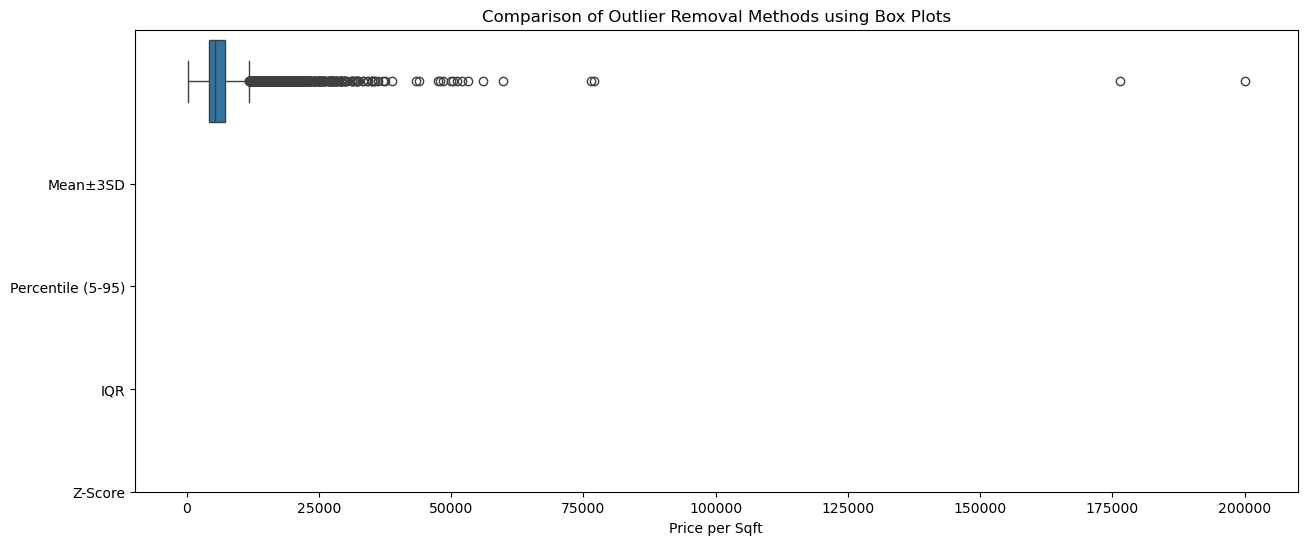

In [59]:
#box plotting
plt.figure(figsize=(15, 6))
sns.boxplot(data=[ df_mean_std['price_per_sqft'], df_percentile['price_per_sqft'],
                  df_iqr['price_per_sqft'], df_zscore['price_per_sqft']],
            orient='h')
plt.xticks(rotation=0)
plt.yticks([ 1, 2, 3, 4], [ 'Mean±3SD', 'Percentile (5-95)', 'IQR', 'Z-Score'])
plt.title("Comparison of Outlier Removal Methods using Box Plots")
plt.xlabel("Price per Sqft")
plt.show()


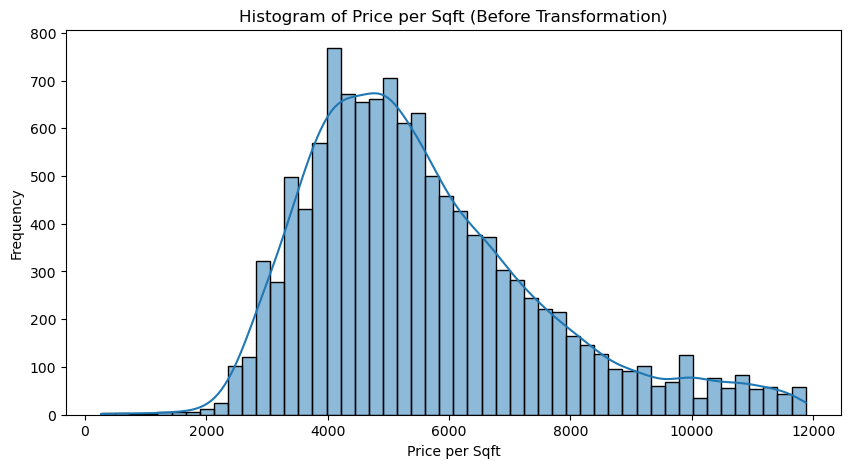

In [61]:
#q4
from scipy.stats import skew, kurtosis


data = df_iqr['price_per_sqft']

# 1. Histogram before transformation
plt.figure(figsize=(10, 5))
sns.histplot(data, bins=50, kde=True)
plt.title("Histogram of Price per Sqft (Before Transformation)")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()


In [63]:
#skewness and kurtosis before transformation
print(f"Skewness: {skew(data):.2f}")
print(f"Kurtosis: {kurtosis(data):.2f}")

Skewness: 0.94
Kurtosis: 0.68


In [67]:
#Log transformation
data = df_iqr['price_per_sqft']

data_log = np.log1p(data)
# After transformation
print("\nAfter Log Transformation:")
print(f"Skewness: {skew(data_log):.2f}")
print(f"Kurtosis: {kurtosis(data_log):.2f}")


After Log Transformation:
Skewness: -0.13
Kurtosis: 1.33


In [73]:
#Q5, check the correlaion between all the numerical values
corr = df.corr(numeric_only=True)

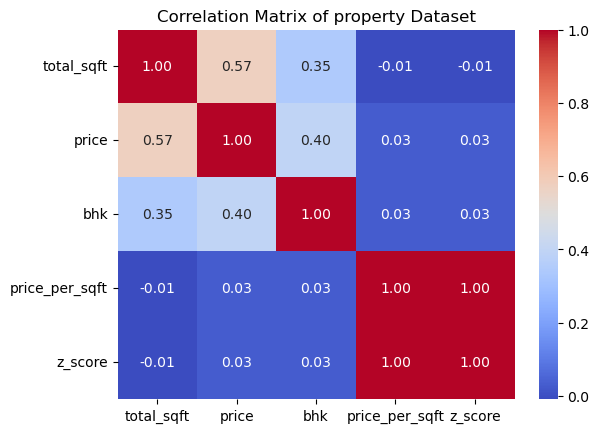

In [77]:
# Create heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of property Dataset")
plt.show()

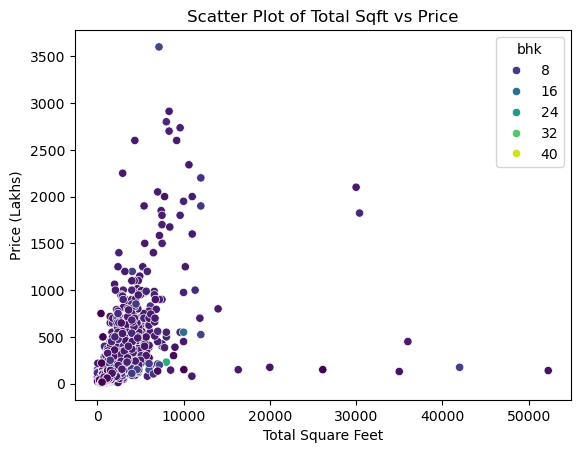

In [81]:
#Q6 plot the scatter plot btwn the variables to check the correaltion btw them
sns.scatterplot(x="total_sqft", y="price", hue="bhk", data=df, palette="viridis")
plt.xlabel("Total Square Feet")
plt.ylabel("Price (Lakhs)")
plt.title("Scatter Plot of Total Sqft vs Price")
plt.show()